<a href="https://colab.research.google.com/github/Jaspreet-Singh619/AIProjects/blob/main/LSTM_StockMarket_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
!pip install yfinance


In [22]:
import yfinance as yf

In [23]:
data = yf.download("AAPL", start="2015-01-01", end="2022-01-22")

[*********************100%***********************]  1 of 1 completed


In [24]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [25]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.373955,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.687305,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.689531,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.021717,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.944685,237458000


In [28]:
df1=data.reset_index()['Close']

In [32]:
df_mod=df1.iloc[0:10]

In [33]:
df_mod

,Close
0,27.332500
1,26.562500
2,26.565001
3,26.937500
4,27.972500
5,28.002501
6,27.312500
7,27.555000
8,27.450001
9,26.705000


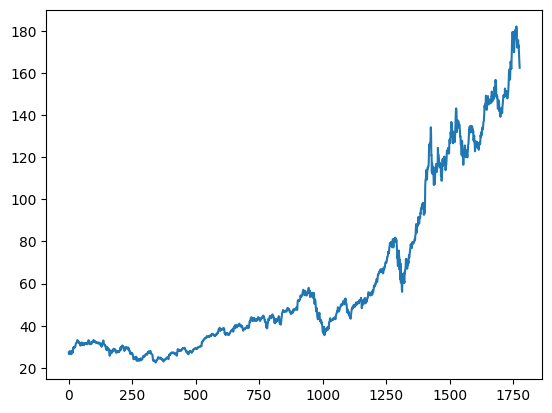

In [35]:
plt.plot(df1)

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [38]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [39]:
training_size,test_size

(1155, 622)

In [40]:
train_data

array([[0.0297789 ],
       [0.02494904],
       [0.02496473],
       ...,
       [0.18518112],
       [0.17826566],
       [0.16151796]])

In [41]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [42]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [50]:
X_train.shape

(1054, 100)

In [51]:
X_test.shape

(521, 100)

In [52]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [54]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 296ms/step - loss: 0.0055 - val_loss: 0.0412
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - loss: 5.1147e-04 - val_loss: 0.0023
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - loss: 1.7803e-04 - val_loss: 0.0100
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - loss: 1.5859e-04 - val_loss: 0.0069
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 206ms/step - loss: 1.3722e-04 - val_loss: 0.0101
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - loss: 1.2747e-04 - val_loss: 0.0092
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 1.2832e-04 - val_loss: 0.0107
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - loss: 1.2317e-04 - val_loss: 0.0104
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - loss: 1.1611e-04 - val_loss: 0.0123
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - loss: 1.2005e-04 - val_loss: 0.0108
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - loss: 1.1504e-04 - val_loss: 0.0181


In [58]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


In [60]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [61]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

37.70604401747946

In [62]:
math.sqrt(mean_squared_error(ytest,test_predict))

106.12288371985791

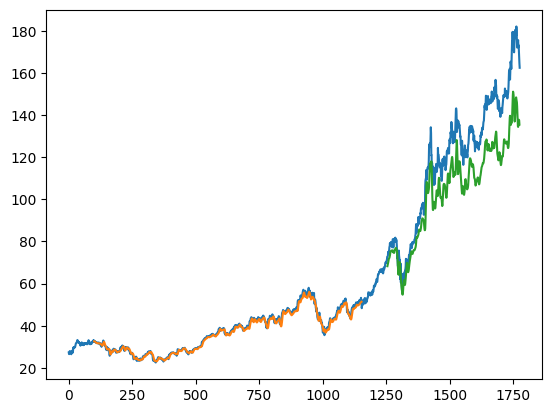

In [67]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [73]:
x_input=test_data[522:].reshape(1,-1)
x_input.shape


(1, 100)

In [74]:
test_data.shape

(622, 1)

In [75]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input


[0.8106947245265672,
 0.8149600072319532,
 0.8221107014291099,
 0.8261879112389731,
 0.8411792830957928,
 0.8312686550486111,
 0.8247452533487862,
 0.7927552502128024,
 0.7963933361322536,
 0.7874235511196727,
 0.7931315874266426,
 0.7916261428598843,
 0.7745021296503716,
 0.7549318288394998,
 0.7580053132267934,
 0.7731849494019306,
 0.7793320138879152,
 0.7798965197086756,
 0.7701740602684141,
 0.7484711181048492,
 0.7542418453769936,
 0.7458993528617445,
 0.7531127380240755,
 0.7310961496118449,
 0.7434530652603855,
 0.7490356239256096,
 0.7571271611573671,
 0.7546808735560081,
 0.7541163677352477,
 0.7459620438269188,
 0.7421985759771189,
 0.7600752636143122,
 0.7668496205976287,
 0.7775757097490624,
 0.7914379742529641,
 0.7945742453168294,
 0.7959542122418418,
 0.7909989460739496,
 0.7906852998252837,
 0.7949506782420669,
 0.7920025757851218,
 0.8153364401571906,
 0.7979614716641863,
 0.792692559247628,
 0.7993414385891987,
 0.8085620831738741,
 0.8052376435030888,
 0.80724480721

In [76]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.66928667]
101
1 day input [0.81496001 0.8221107  0.82618791 0.84117928 0.83126866 0.82474525
 0.79275525 0.79639334 0.78742355 0.79313159 0.79162614 0.77450213
 0.75493183 0.75800531 0.77318495 0.77933201 0.77989652 0.77017406
 0.74847112 0.75424185 0.74589935 0.75311274 0.73109615 0.74345307
 0.74903562 0.75712716 0.75468087 0.75411637 0.74596204 0.74219858
 0.76007526 0.76684962 0.77757571 0.79143797 0.79457425 0.79595421
 0.79099895 0.7906853  0.79495068 0.79200258 0.81533644 0.79796147
 0.79269256 0.79934144 0.80856208 0.80523764 0.80724481 0.80197589
 0.8042967  0.78616906 0.78585542 0.79915327 0.79921596 0.8054885
 0.82110717 0.84858084 0.8653913  0.8683394  0.87078569 0.87411013
 0.84193196 0.86344683 0.89518587 0.89186143 0.88552611 0.87348284
 0.89531135 0.93206836 0.95653133 0.95326958 0.98394231 0.96067123
 0.95182692 0.98300146 0.93884271 0.9318175  0.92309867 0.94342174
 0.96004394 0.96405836 0.98946218 0.98293868 0.98350328 0.97610163
 0.97214999 1.         0.98551044 